# Маркетинговый анализ

Для исследования представлены данные компании Procrastinate Pro+: информация о посещениях сайта, заказах и расходах на рекламу. 
На протяжении последних месяцев компания терпит убытки несмотря на большие вложения в рекламу.


# Цель, задачи анализа и алгоритм действий

Данное исследование направлено на выявление причин снижения прибыли. Планируется, что полученные выводы будут применены при выработке новой маркетинговой стратегии компании и, как следствие, помогут увеличить прибыль компании.  

В задачи исследования входит следующее:

     - выявление источников привлечения пользователей, а также изучение устройств, которыми те пользуются;
     - выявление стоимости привлечения пользователей из различных рекламных каналов(CAC); 
     - выявление прибыли, которую приносит каждый клиент(LTV);
     - выявление перидоов времени, когда расходы на клиенты окупаются; 
     - подсчет общую сумму расходов на маркетинг;
     - изучение распределения рекламных трат по каналам привлечения; 
     - построение визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику;
     - изучение средней стоимости привлечения одного пользователя (CAC) из каждого источника;
     - анализ окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI;
     - проверка конверсии пользователей и динамики её изменения;
     - проверка удержания пользователей;
     - анализ окупаемости рекламы с разбивкой по устройствам;
     - анализ окупаемости рекламы с разбивкой по регионам;
     - анализ окупаемости рекламы с разбивкой по каналам привлечения;
     - проверка конверсии и удержания.


## Подготовка данных к анализу

In [1]:
import matplotlib.pyplot as plt #импортируем библиотеку matpolib.byplot для того, чтобы в дальейшем присваивать осям и самим графикам названиям
import pandas as pd #импортируем бибилиотеку pandas для работы с датафреймом
import numpy as np
import seaborn as sns #импортируем библиотеку seaborn для посстроения хитмэпов
from datetime import datetime, timedelta

 

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')


In [3]:
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('orders_info_short.csv')


In [4]:
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')


### Предобработка датафрейма visits

**Сначала выгрузим первые пять строк датафрейма**

In [5]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


**Как мы видим, пропуски отсутствуют.** 

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

**Приведем к нижнему регистру названия столбцов**

In [8]:
visits.columns = map(str.lower, visits.columns)

**Переменуем столбцы user id, session start и session start путем добавления дефисов.**

**Изучим уникальные названия каналов привлечения пользователей, чтобы убедиться в отсутствии неявных дубликатов. Дубликатов нет.**

In [9]:
visits.channel.unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session start  309901 non-null  datetime64[ns]
 5   session end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Перейдем к столбцу с данными о заказах.**

In [11]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


**Повторим алгоритм, ранее примененный к предобработке данных в датафрейме visits.**

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])


In [14]:
orders.columns = map(str.lower, orders.columns)

In [15]:
orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


**Изучим уникальные значения прибыли, чтобы убедиться в отсутствии аномально высоких значений. Как видно ниже, разница между самой низкой и самой высокой прибылью составляет около 45 долларов. Обращает на себя внимание то, что все значения не явлются целыми числами. Также все дробные значения свопадают. Скорее всего, это связано с тем, в магазине есть четкое деление всей продукции на несколько ценовых категорий.** 

In [16]:
orders['revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

**Перейдем к предобработке данных из датафрейма costs.**

In [17]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Как и в двух других датвфреймах, в costs нет пропусков**

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [20]:
costs.columns = map(str.lower, costs.columns)

In [21]:
visits.columns=['user_id','region', 'device', 'channel','session_start', 'session_end']
orders.columns= ['user_id','event_dt','revenue']
costs.columns=['dt','channel','costs']

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

**Соберем функции для создания профилей, а также расчёта удержания, конверсии, LTV и ROI.**

In [22]:

# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles




In [23]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [25]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Перейдем к функция для построения графиков**

In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [27]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных 

###  Составление пользовательских профилей

**Чтобы избежать ошибок при объединении нескольких таблиц, приведем данные о дате проведения рекламной кампании в тип object.**

In [30]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs['dt'] = costs['dt'].dt.date

In [31]:
# получаем профили пользователей
profiles = get_profiles(sessions=visits, orders=orders, ad_costs=costs)
profiles.head()


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


**Определим минимальную и максимульную дату привлечения пользователей.**

**Cначала посмотрим, когда была совершена последняя сессия. Она датитируется 1 ноября, и было совершена в ночь с 31 октября на 1 ноября. Таким образом, дата последней сессии и дата проведения анализа (1 ноября 2019 г.) совпадают.**

In [32]:
visits.session_end.max()

Timestamp('2019-11-01 01:38:46')

**Минимальная дата привлечения - это 1 мая 2019 г.**

In [33]:
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

**Максимальная дата - 27 октября 2019 г.**

In [34]:
max_analysis_date = profiles['dt'].max()
max_analysis_date

datetime.date(2019, 10, 27)

###  Изучение распределения платящих пользователей по регионам

**Выясним, из каких странах приходят в приложение пользователи.** 

**Как видно ниже, больше всего было привлечено пользователей из США. Их в 5-6 раз больше, чем пользователей из Франции, Соединенного Королевства и Германии. Также выявлено, что на США приходится самая высокая доля платящих пользователей.Нет значительных различий между Соединенным Королевством и Францией: в этих странах  3,9 и 3,7 % пользователей соответственно платят за платят за продукт компании. В США 6.9 % пользователей становятся покупателями, однако все равно показатель довольно низкий.**

In [35]:
country_profile = (
        profiles.sort_values(by=['payer'])
        .groupby('region')
        .agg({'user_id': 'nunique', 'payer':'sum', 'payer': 'mean'})
        .sort_values(by='payer', ascending=False)
        .reset_index()
    )
country_profile

,region,user_id,payer
0,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
3,France,17450,0.037994


### Изучение распределения платящих пользователей по устройствам

**Посмотрим, какие устройства пользуются наибольшей популярностью среди платящих пользователей. Чаще всего заходили с устройств компании Apple: 6.3 % пользователей Mac заплатили за продукт компании, в то время как среди пользователей iPhone эта цифра составляет 6.2 %. С незначительным отрывом третье место занимают устройства на платформе Android: 5.8 % их пользователей стали клиентами. Четвертое и последнее место занял ПК: 5 % пользователей ПК стали клиентами. Разница с Mac небольшая, однако она есть: в маркетинге за каждым процентом и долей процента стоят реальные люди. В целом, на основании приведенных ниже сведений о популярность устройства нельзя прийти к выводу, какие устройства популярнее среди пользователей: компьютеры или смартфоны.**

In [36]:
device_profile = (
        profiles.groupby('device')
        .agg({'user_id':'nunique','payer':'sum','payer':'mean'})
        .sort_values(by='payer', ascending=False)
)
device_profile

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


### Изучение распределения платящих пользователей по каналам привлечения

**Посмотрим, какие рекламные каналы привлечения являются самыми эффективными.**

**Самым эффективным каналом привлечения пользователей, которые по итогу купили продукт, является FaceBoom: 12 % привлеченных  через него пользователей стали покупателями. Второе место занимает AdNonSense; 11 % пользователей стали покупателями. Тройку лидеров замыкает lambdaMediaAds: 10 % привлеченных через нее пользоватлей стали покупателями. Наименее эффективным оказался OppleCreativeMedia (лишь 2% оплатили продукт), так как доля покупателей совпадает с долей покупателей, на привелчение которых не понадобились никакие расходы (органические пользователи). LeapBob, MediaTornado и YRabbit также не очень эффективны: только 3 % пользователей заплатили за продукт.**

In [37]:
channel_profile = (
        profiles.groupby('channel')
        .agg({'user_id':'nunique','payer':'sum','payer':'mean'})
        .sort_values(by='payer', ascending=False)
)
channel_profile


,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


In [38]:
# Код ревьюера
channel_profile = (
        profiles.groupby('channel')
        .agg({'user_id':'nunique','payer':'sum','payer':'mean'})
        .sort_values(by='payer', ascending=False)
        .style.format({'user_id': '{:.0f}', 'payer': '{:.2%}'})
)
channel_profile


,user_id,payer
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


## Маркетинг

**Для исследования необходимо определить момент анализа и горизонт анализа.**

**Согласно условиям, нужно проводить анализ исходя из того, что сегодня 1 ноября 2019 г.; это дата и будет являться моментом анализа. Также заявлено, что пользователи должны окупаться не позднее чем через две недели после привлечения; вследствие этого установим, что горизонт анализа составляет 14 дней.** 

In [39]:
observation_date = datetime(2029, 11, 1).date() #момент анализа

horizon_days = 14 #горизонт анализа

**Посчитаем общую сумму расходов на маркетинг.**

### Подсчет общих расходов на рекламу

**В анализируемый период компания потратила около 105 с половиной тысяч долларов на привлечение покупателей.**

In [40]:
total_marketing_costs = profiles['acquisition_cost'].sum()
total_marketing_costs

105497.29999999999

### Распределение трат на рекламу по каналам привлечения

**Посмотрим, как траты распределены по рекламным источникам.**

**Больше всего средств было потрачено на привлечение пользователей через канал TipTop, а он занимает только четвертое место по эффективности. Второе место занимает лидер по количеству продаж FaceBoom: примечательно, что разница в расходах на TipTop и FaceBoom составляет около 25 тыс. долларов, следовательно существует вероятность, что траты на привлечение пользователей через TipTop не окупаются, либо по итогшу компания получает незначительную прибыль. Третье место по объему расходов занимает WahooNetBanner, хотя этот канал занимает 7 место по эффективности. На lambdaMediaAds,занимающей третье место по эффективности, приходится довольно низкие расходы по сравнею с платформами, которве менее эффективны.**

In [41]:
costs_channel_profile = (
        profiles.groupby('channel')
        .agg({'acquisition_cost':'sum'})
        .sort_values(by='acquisition_cost', ascending=False)
)
costs_channel_profile

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

**Детализируем данные об изменении расходов на рекламу. Для этого отдельно посмотрим, как в изучаемый период расходы менялись в зависимости от недели и месяца. Добавим в датафрейм costs дополнительные столбцы с неделей и месяцев.** 

In [42]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

In [43]:
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


**Построим визуализацию динамики изменения расходов во времени по неделям и месяцам c разбивкой по каналам привлечения.**

In [44]:
week_costs = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').reset_index()
week_costs


channel,week,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
0,18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.20,81.6
1,19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.90,103.2
2,20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.30,90.4
3,21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.40,119.2
4,22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.80,83.2
5,23,102.90,1081.3,66.99,27.60,79.50,76.050,1223.6,196.8,25.80,35.2
6,24,96.60,1042.8,52.29,29.76,71.50,63.180,1121.0,166.2,17.46,45.6
7,25,141.75,1280.4,68.46,32.16,79.75,80.730,1474.4,201.6,22.14,40.0
8,26,148.05,1647.8,99.75,40.56,107.00,78.260,2343.6,285.0,27.90,59.2
9,27,130.20,1536.7,87.36,43.44,102.50,75.075,2340.0,256.8,28.26,60.0


In [45]:

month_costs = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').reset_index()
month_costs

channel,month,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
0,5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
1,6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
2,7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
3,8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
4,9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
5,10,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


**На графике ниже видно, что расходы  на привлечение пользователей через большинство каналов на протяжении всего анализируемого периода были практически одинаковыми. На протяжении первых пяти недель немного выше были расходы на AdNonSense однако уже в последующий период расходы на него выровнялись с остальными. Из всех каналов выделяются FaceBoom и TipTop:расходы на привлечение пользователей через эти каналы были значительно больше, чем на другие каналы. На 4 неделе анализа произошло резкое увеличение расходов на эти два каналы. Несмотря на последующее сокращение, расходв вновь начали расти. Пик расходов для обоих платформ пришелся на 21-ой неделе периода анализа(39-я неделя 2019 г.). Если мы рассмотрим недельную динамику, то отрыв TipTop и FaceBoom от остальных каналов станет еще сильнее. Расходы на TipTop на пике в сентябре были более чем в 12 раз выше, чем на другие платформы и составили около 13 тыс. долларов. Пик расходов на FaceBoom пришелся на август; разница в расходах с остальными платформами (за исключением TipTop) составила около 6 тыс. долларов. Стоит отметить, что рост расходов на TipTop происходил стремительно, в то время как расходы на FaceBoom с июня росли постепенно; с июля расходы немного снизились.**

**Очень высокие расходы на привлечение пользователей через TipTop нецелесообразны, поскольку эта платформа занимает лишь четвертое место по доле платящих пользователей. На привлечение пользователей через TipTop пришлась почти половина всех расходов на рекламу, а по факту расходы компании не окупились.**


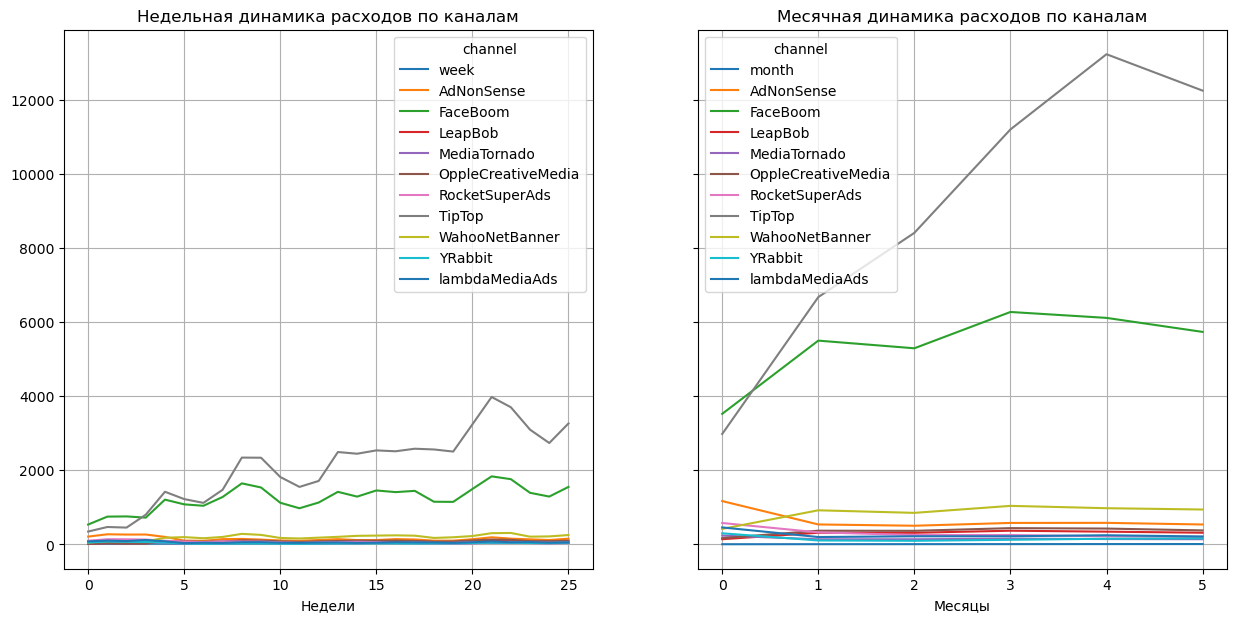

In [46]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
week_costs.plot(grid=True, ax=ax1)
plt.xlabel('Недели')
plt.title('Недельная динамика расходов по каналам')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
month_costs.plot(grid=True, ax=ax2)
plt.xlabel('Месяцы')
plt.title('Месячная динамика расходов по каналам')
plt.show()

### Средняя стоимость привлечения пользователя из каждого источника

**В среднем дороже всего привлечь пользователей через TipTop; привлечение одного пользователя компании обходилось в среднем в 2.79 долларов. Второе место по средней стоимости привлечения пользователей занимает FaceBoom, который лидирует по доле платящих пользователей. Тройку лидеров замыкает AdNonSense - привлечение одного пользователя в среднем обходилось в 1 доллар.Для того, чтобы привлечь пользователей через lambdaMediaAds, занимающую 3-е место по доле покупателей, компания платила около 0.75. У этой платформы есть потенциал, а поскольку расходы на привлечение через нее пользователей ниже, чем на FaceBoom и AdNonSense, можно порекомендовать маркетологам увеличить расходы на рекламу на данной платформе.**

In [47]:
avg_cac_per_channel =  (
    profiles.query('channel != "organic"')
    .pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
)
avg_cac_per_channel.sort_values(by='acquisition_cost',ascending=False)


,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Таким образом, можно сделать вывод о том, что компания неэффективно распоряжается бюджетом на рекламу. Вложение больших средств для привлечения пользователей через TipTop приводит к тому, что компания по факту находится в минусе: через этот канал пользовател приходят, однако обходится каждый такой пользователь для компании дорого, и лишь 9 % из привлеченных становятся покупателями, в связи с чем по факту компания находится в минусе. Самая эффективная с точки зрения привлечения будущих покупателей платформа FaceBoom обходится компании на 22 тыс. долларов дешевле, и доля покупателей у нее выше на 3 %. В качестве промежуточного вывода стоит зафиксировать, что компании необходимо отказаться от больших маркетинговых вложений в TipTop. Вместо этого стоит обратить внимание на каналы AdNonSense и lambdaMediaAds: они оба входят в топ-3 по доле платящих пользователей, и стоимость привлечения на них пользователей на превышала 1 доллара. Небольшое по сравнению с другими каналми количество привлеченных пользователей не должно настораживать: скорее всего, при перераспределении бюджета в пользу этих каналов получится  не простто увеличить число привлекаемых на них пользователей, но и получить новых покупателей.** 

## Оценка окупаемости рекламы

In [48]:
profiles = profiles.query('channel != "organic"') #удалим из датафрейма пользователей,которые сами пришли в приложение

### Анализ окупаемости рекламы: LTV и ROI, а также динамика LTV, CAC и ROI

**График LTV демонстрирует, что на протяжении изучаемого максимальная сумма, которую пользователи приносили компании на 14-ый день после присоединения, составляла около 90 центов.**

**Как видно на графике ROI, затраты компании на рекламу не окупились на протяжении всего исследуемого периода.**

**График динамики LTV показывает, что наиболее высокая валовая прибыль, которую средний пользователь принес на 14-ый день после начала пользования продуктом, пришлась на середину июня. Вслед за ростом последовало резкое падение LTV: оно продолжалось практически на протяжении всей второй половины июня, однако потом рост восстановился, но он уже не был таким стремительным. В целом, на протяжении всего анализируемого периода динамика ltv носит скачкообразный характер; при этом, однако, с конца сентября наметился тренд на понижение.В нашем случае скачки можно объяснить сезонностью, стабильность, в целом, cохраняется.** 

**Что касается динамика стоимости привлечения пользователей (CAC), то на графике видно, что в каждом последующем месяце привлечение пользователей обходилоьс компании все дороже. Это связано с тем,  что с августа начали стремительно расти расходы на TipTop, канал, через который дороже всего привлечь новых пользователей. Также стоит учесть, что довольно высокие были расходы и на FaceBoom. Таким образом, рост CAS был вызван увеличением расходов на 2 платформы, что в свою очередь повлияло на общие показатели расходов компании.Еще одно доказательство того, что TipTop были вложен объем средств, не соимзмеримый со степенью эффективности данного канала.**

**График динамики ROI показывает, что на протяжении мая и первой половины июня расходы компании на рекламу окупались в пределе до 120%. Однако уже во второй половине июня окупаемость стала отрицательной; такой тренд сохранялся на протяжении оставшегося исследуемого периода. До окупаемости не хватало 20-40 %.**

### Конверсия пользователей и динамика ее изменения 

**Как видно на тепловой карте, самый высокий коэфицент конверсии в конце горизонта анализа; т.е. к 14-му дню 8.04 % пользователей стали покупателями.**

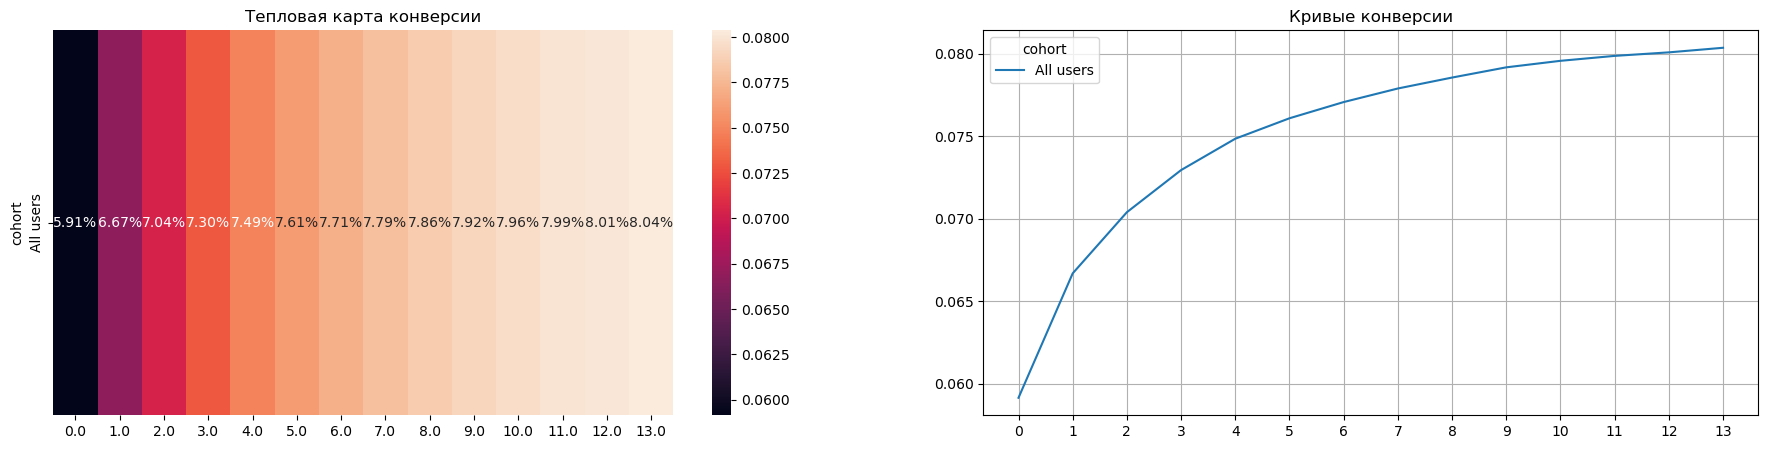

In [49]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, 14
)

plt.figure(figsize = (22, 5)) # задаём размер сетки для графиков

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии')

plt.show()

**Изучим конверсию с разбивкой по регионам. Обе визуализации демонстрируют, что самая высокая конверсия в анализируемый период была среди пользователей c Mac; отрыв от iPhone был не очень большим. Самая низкая конверсия среди пользователей, которые знакомятся с продуктом компании через ПК. Дальше будем разбираться, с чем это может будет связано.**

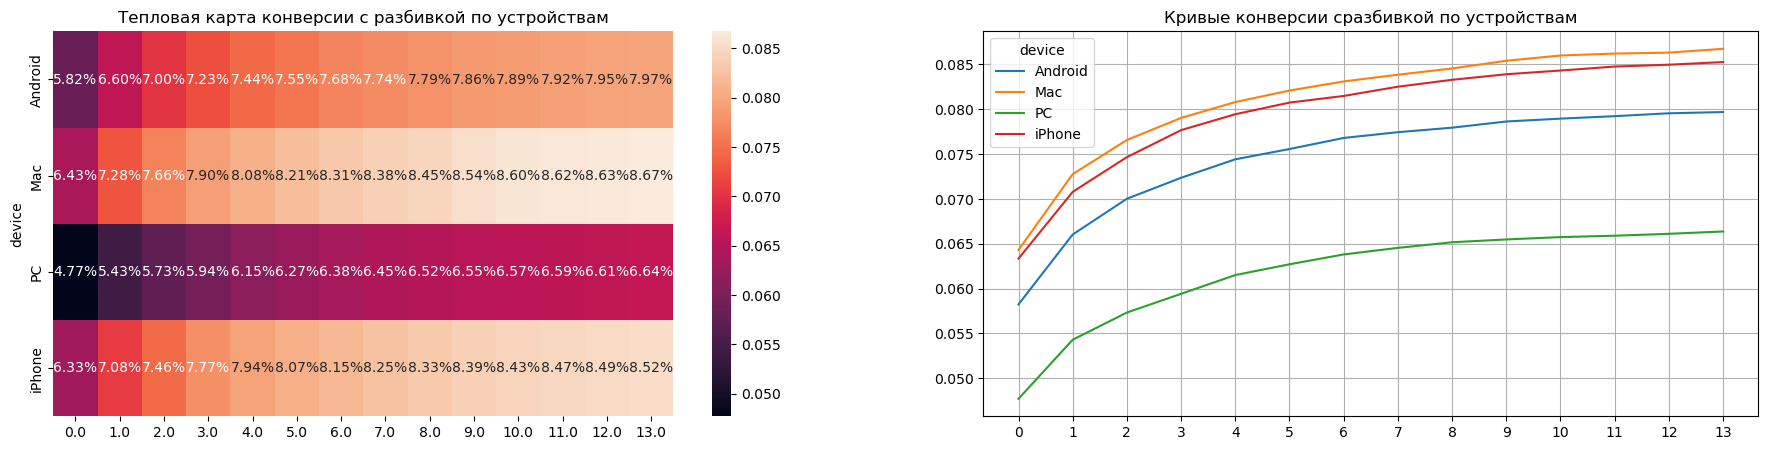

In [50]:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, 14, dimensions=['device']
)

plt.figure(figsize = (22, 5)) # задаём размер сетки для графиков

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии с разбивкой по устройствам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии сразбивкой по устройствам')

plt.show()

**Самая высокая конверсия среди пользователей из США; среди регионов нельзя выделить "аутсайдера".**

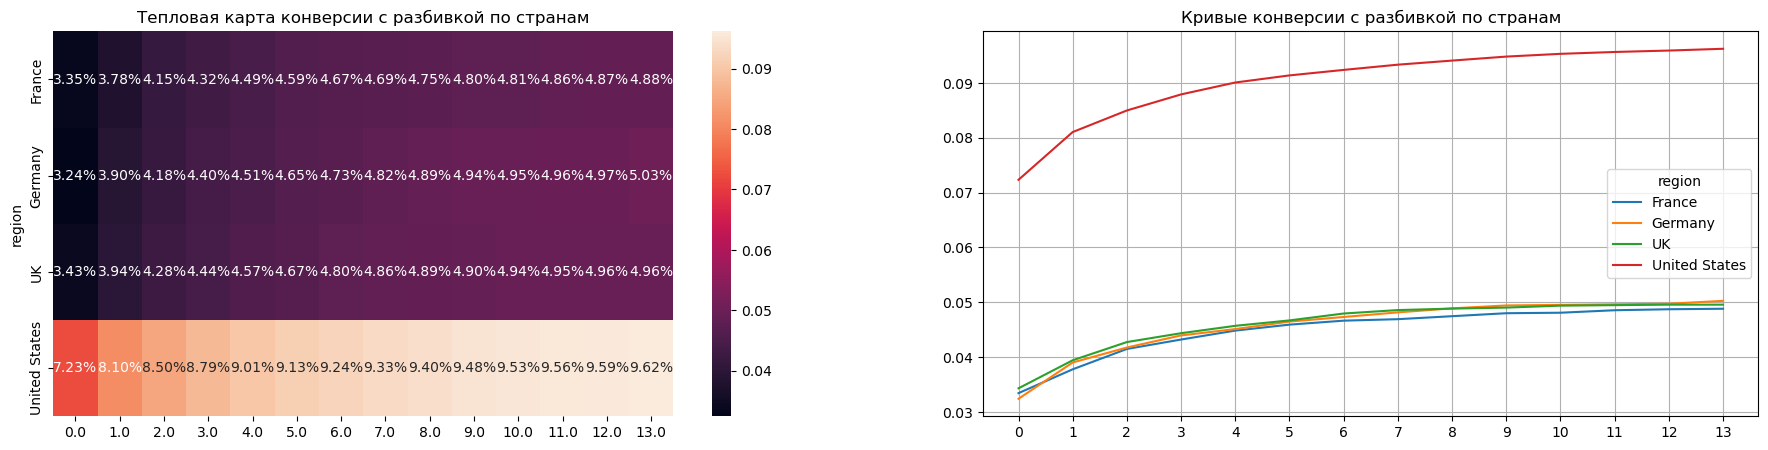

In [51]:

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, 14, dimensions=['region']
)

plt.figure(figsize = (22, 5)) # задаём размер сетки для графиков

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии с разбивкой по cтранам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии с разбивкой по странам')

plt.show()

**Самые высокие показатели конверсии у FaceBoom, AdNonSense и lambdaMedia Ads, а самая низкая - у MediaTornado, LeapBob и OppleCreativeMedia.**

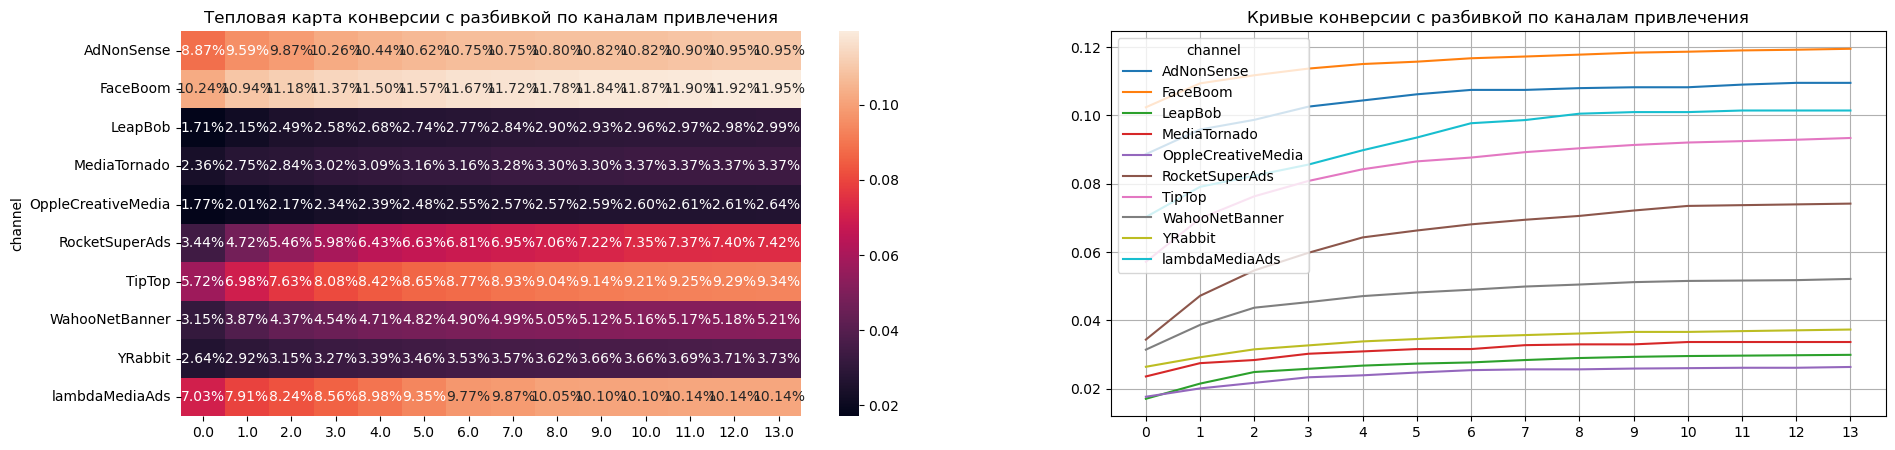

In [52]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, 14, dimensions=['channel']
)

plt.figure(figsize = (22, 5)) # задаём размер сетки для графиков

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии с разбивкой по каналам привлечения')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии с разбивкой по каналам привлечения')

plt.show()

### Анализ удержания

**Перейдем к удержанию. Как и должно быть по правилам, удержание платящих пользователей выше, чем неплатящих.**


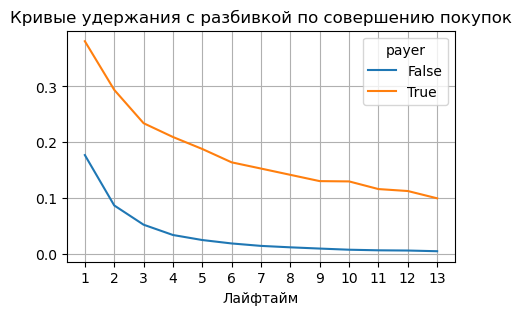

In [53]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, 14
)

report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(5,3))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show()

**Самый высокий показатель удержания среди платящих пользователей ПК. Среди платящих пользователей самое низкое удержание на 14-ый день после привлечения - среди пользователей iPhone.**

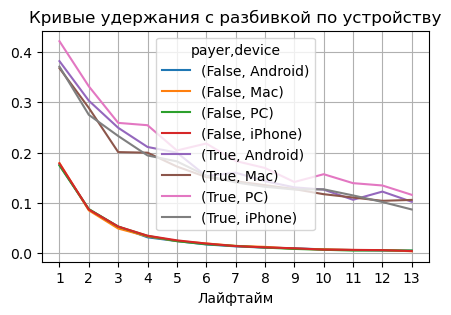

In [54]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, 14, dimensions=['device']
)

report = retention.drop(columns=['cohort_size', 0])

report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(5,3))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по устройству')
plt.show()

**На 14-ый день после привлечения самые высокие показатели удержания у пользователей из Соединенного Королевства и Франции. Самый низкий показатель с существенным отставание от остальных регионов у пользователей из США.**

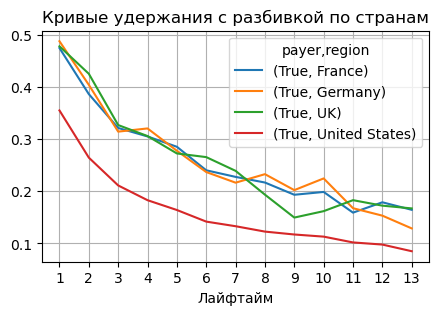

In [55]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, 14, dimensions=['region']
)

report = (
    retention.query('payer == True')
    .drop(columns=['cohort_size', 0])
)

report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(5,3))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по странам')
plt.show()

**Очевидного лидера по показателю удержания нет, а аутсайдеров выявить можно - AdNonSense и FaceBoom.**

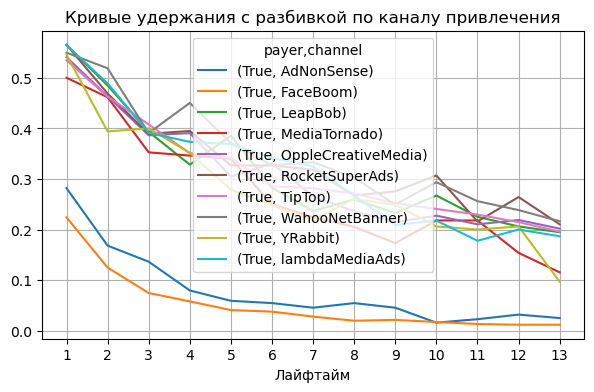

In [56]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, 14, dimensions=['channel']
)

report = (
    retention.query('payer == True')
    .drop(columns=['cohort_size', 0])
)

report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(7,4))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по каналу привлечения')
plt.show()

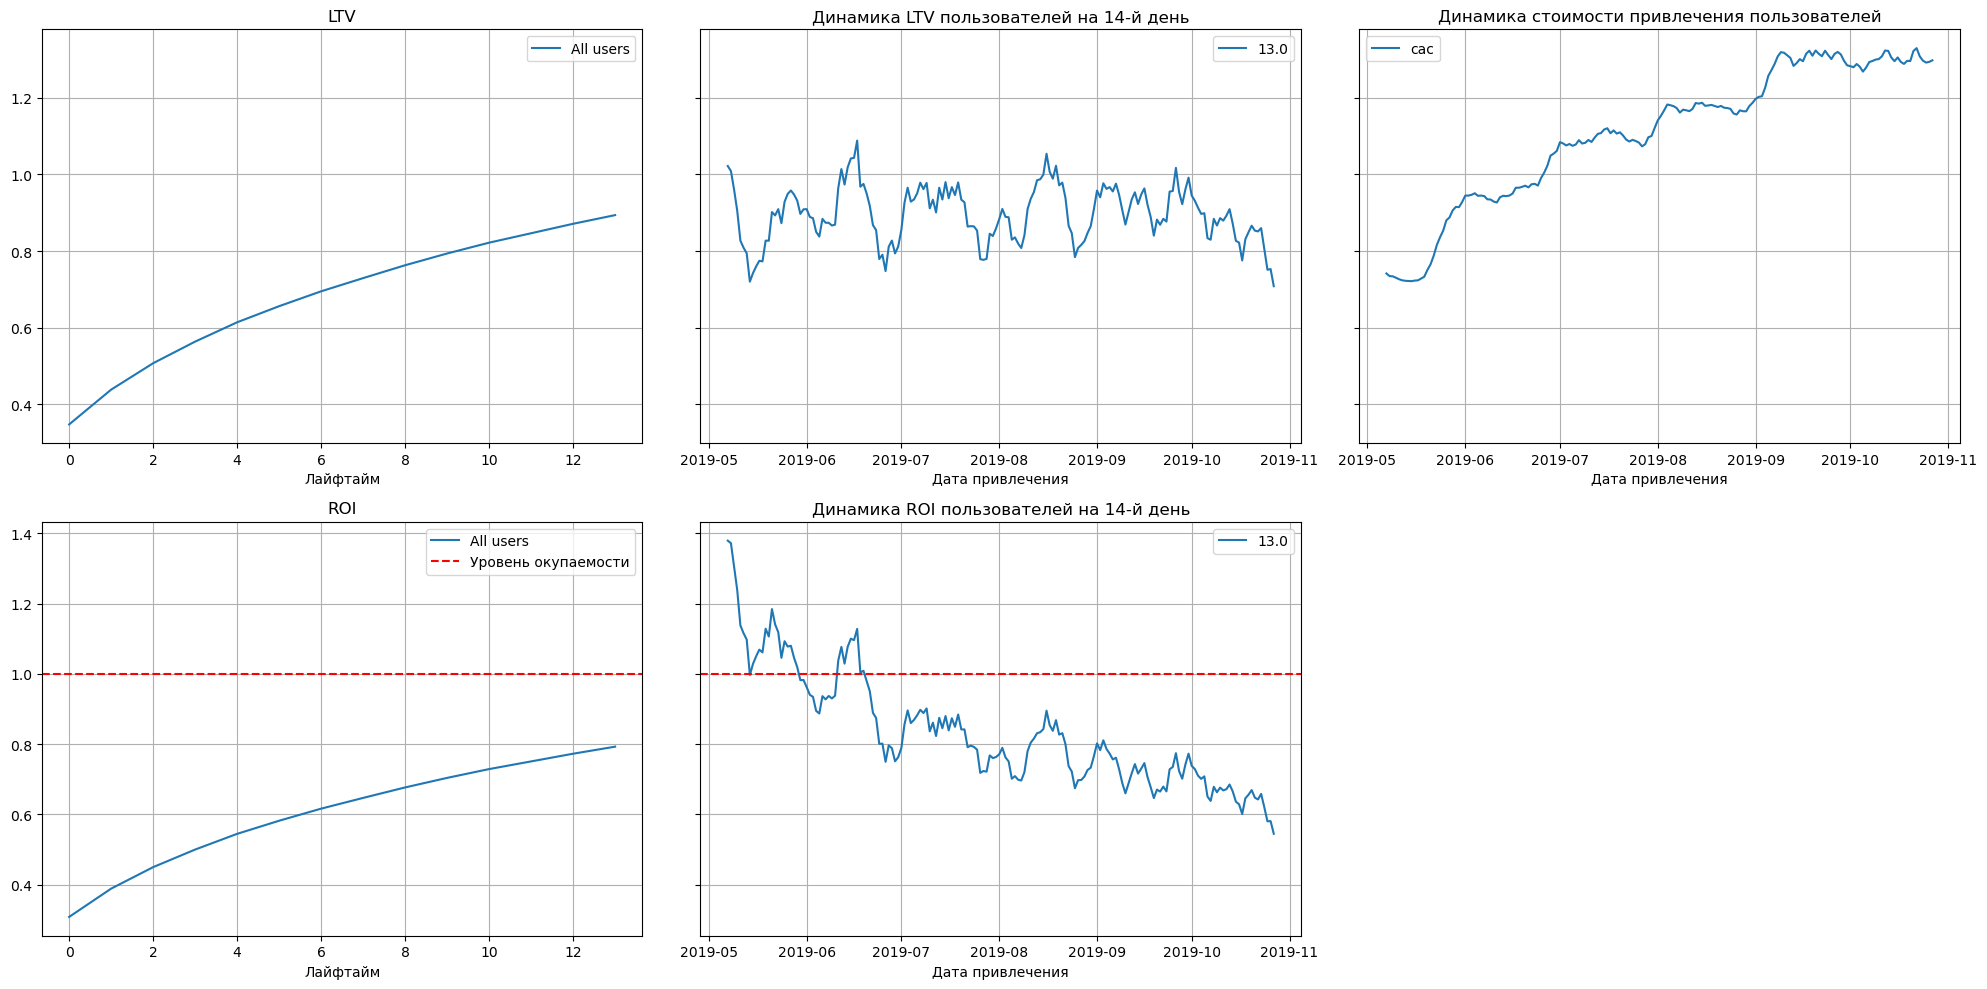

In [57]:
ltv_raw, ltv_grouped,ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

###  Анализ окупаемости рекламы с разбивкой по устройствам: LTV и ROI, а также динамика LTV, CAC и ROI

**В исследуемоый период меньше всего прибыли принесли пользователи, использующие ПК; их отставание от пользователей с другими устройствами заметно. Показатели прибыли от пользователей, использующих Mac, а также iPhone и смартфоны на платформе Android, довольно схожи. Стоит отметить, однако, что прибыль, полученная от пользователей с устройствами на Android, немного устапала в начале устойствам от компании Apple, однако постепенно догнала их.**

**При рассмотрении динамики валовой прибыли, которую средний пользователь принес на 14-ый день после начала пользования продуктом стаонвится заметна скачкообразная тенденция у всех устройств. В целом стабильность сохранялась. Однако стоит отметть наличие фактора сезонности: в июле резко просел LTV в отношении пользователей, которые используют ПК: это может быть связано с сезоном отпусков.**

**На графике динамики CAC видно, что самые высокие затраты были на привлечение пользователей Mac и iPhone. Расходы на привлечение пользователей через PC были почти в 2 раза ниже, что должно повысить привлекательность данного канала в глазах маркетологов при корректировке маркетинговой стратегии.**

**В весь исследуемый период расходы на привлечение пользователей через все каналы не окупались.  Реклама в конце горизонта анализа окупилась только в отношении пользователей, которые используют ПК. Еще одно доказательство того, что у ПК есть потенциал с точки зрения привлечения платящих пользователей и, как следствие, роста прибыли компании.**

**На графике динамике ROI видно, что лучше всего окупается ПК, а хуже - Mac и iPhone. Последнее связано с высокой стоимостью привлечения пользователей на этих устройствах.**

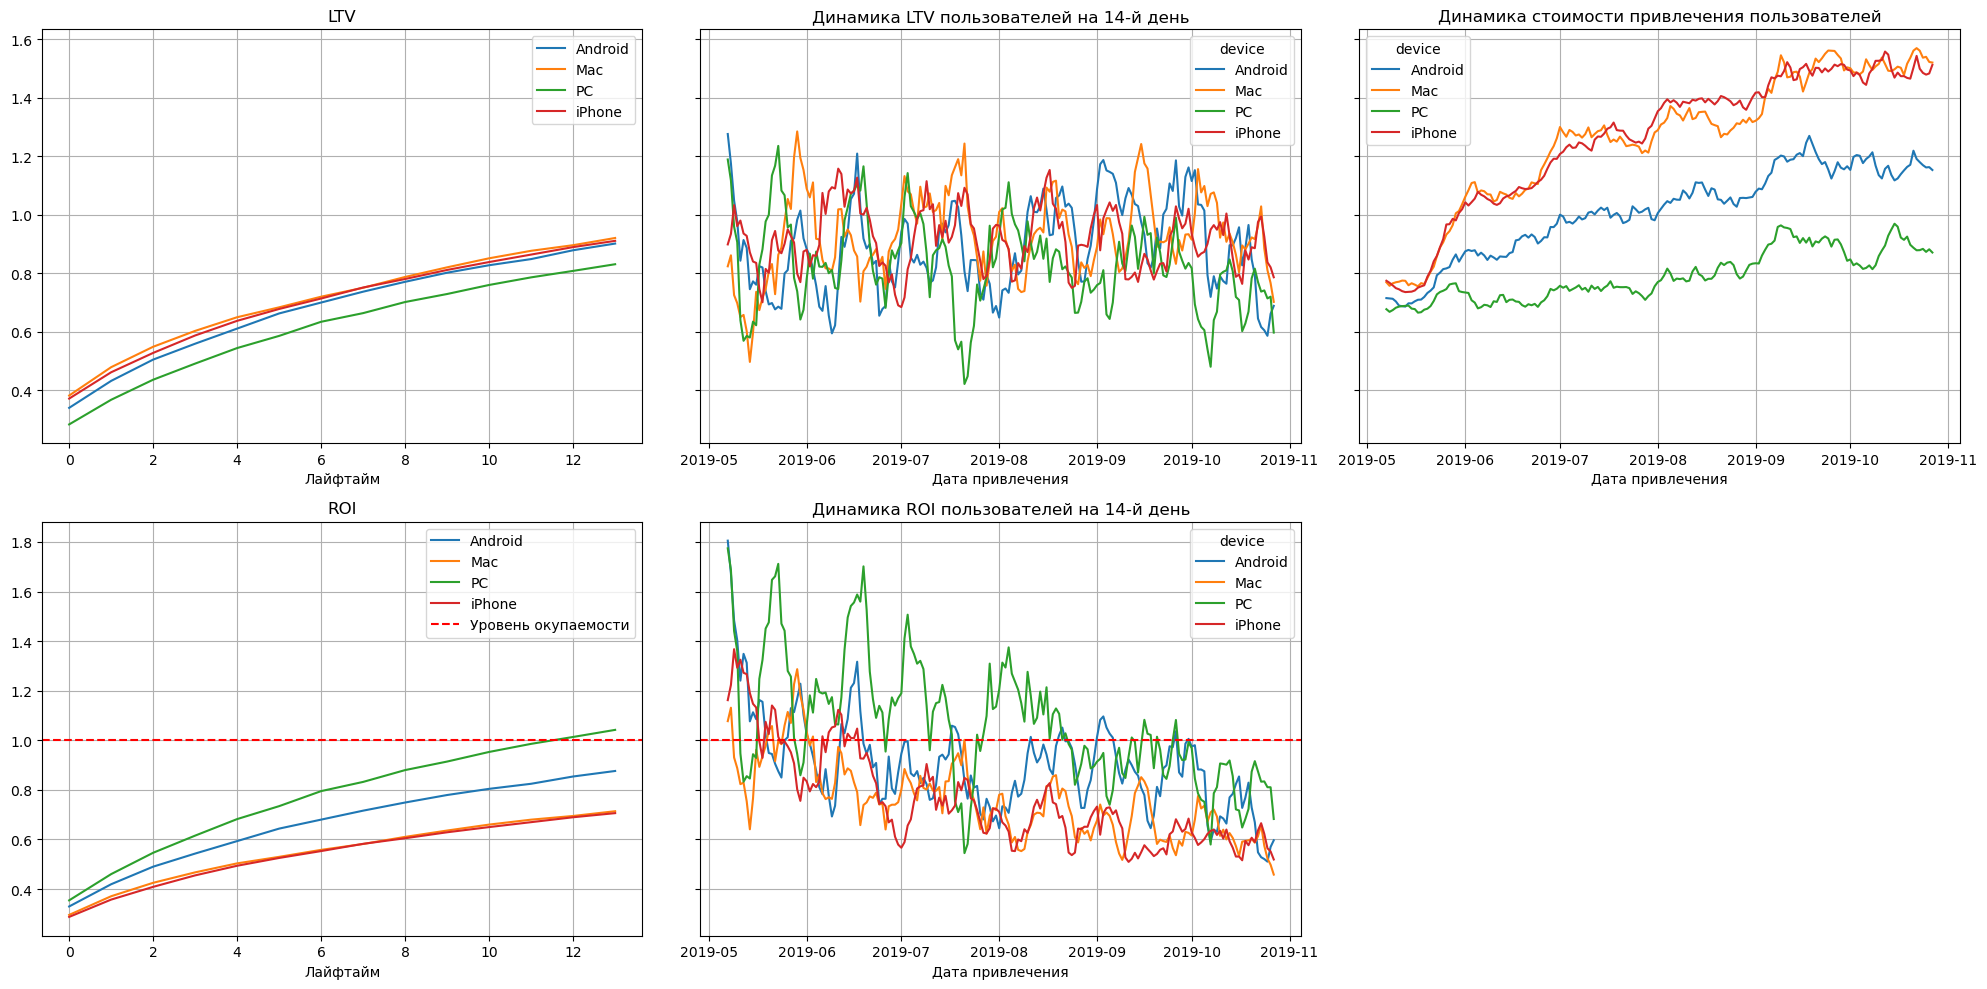

In [58]:
ltv_raw, ltv_grouped,ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

###  Анализ окупаемости рекламы с разбивкой по странам: LTV и ROI, а также динамика LTV, CAC и ROI

**При изучении валовой прибыльности видно, что пользователи из США принесли бóльшую прибыль; отрыв от Германии, Соединенного Королевства и Франции примерно на 0.2 доллара. Наименее прибыльной страной является Франция.**

**Изучая окупаемость, мы видим, что США- это единственный регион, реклама в котором реклама окупилась за весь период. Этому факту стоит обратить внимание.**

**На графике динамики LTV на 14-ый день после присоединении нельзя выделить аутсайдеров. У всех стран динамика носит скачкообразный характер, обособленный сезонностью.**

**В среднем, привлечение одного пользователя из США обходилось компании на 1 доллар больше по сравнению с пользователями из Франции, Соединенного Королевства и Германии. С учетом того, что привлечение пользователей из Соединенных Штатов не окупилось на протяжении всего исследуемого периода, можно констатировать, что большие вложения в привлечение американских пользователей не совсем эффективны.** 

**График динамики ROI подтверждает, что рекламная кампания в США оказалась неуспешной несмотря на то, что в данной регионе самая высокая валовая прибыль.Намного лучше обстоят дела с Соединенным Королевством, где в середине июля и середине августа реклама окупилась на 380 и 320 % соответственно.**

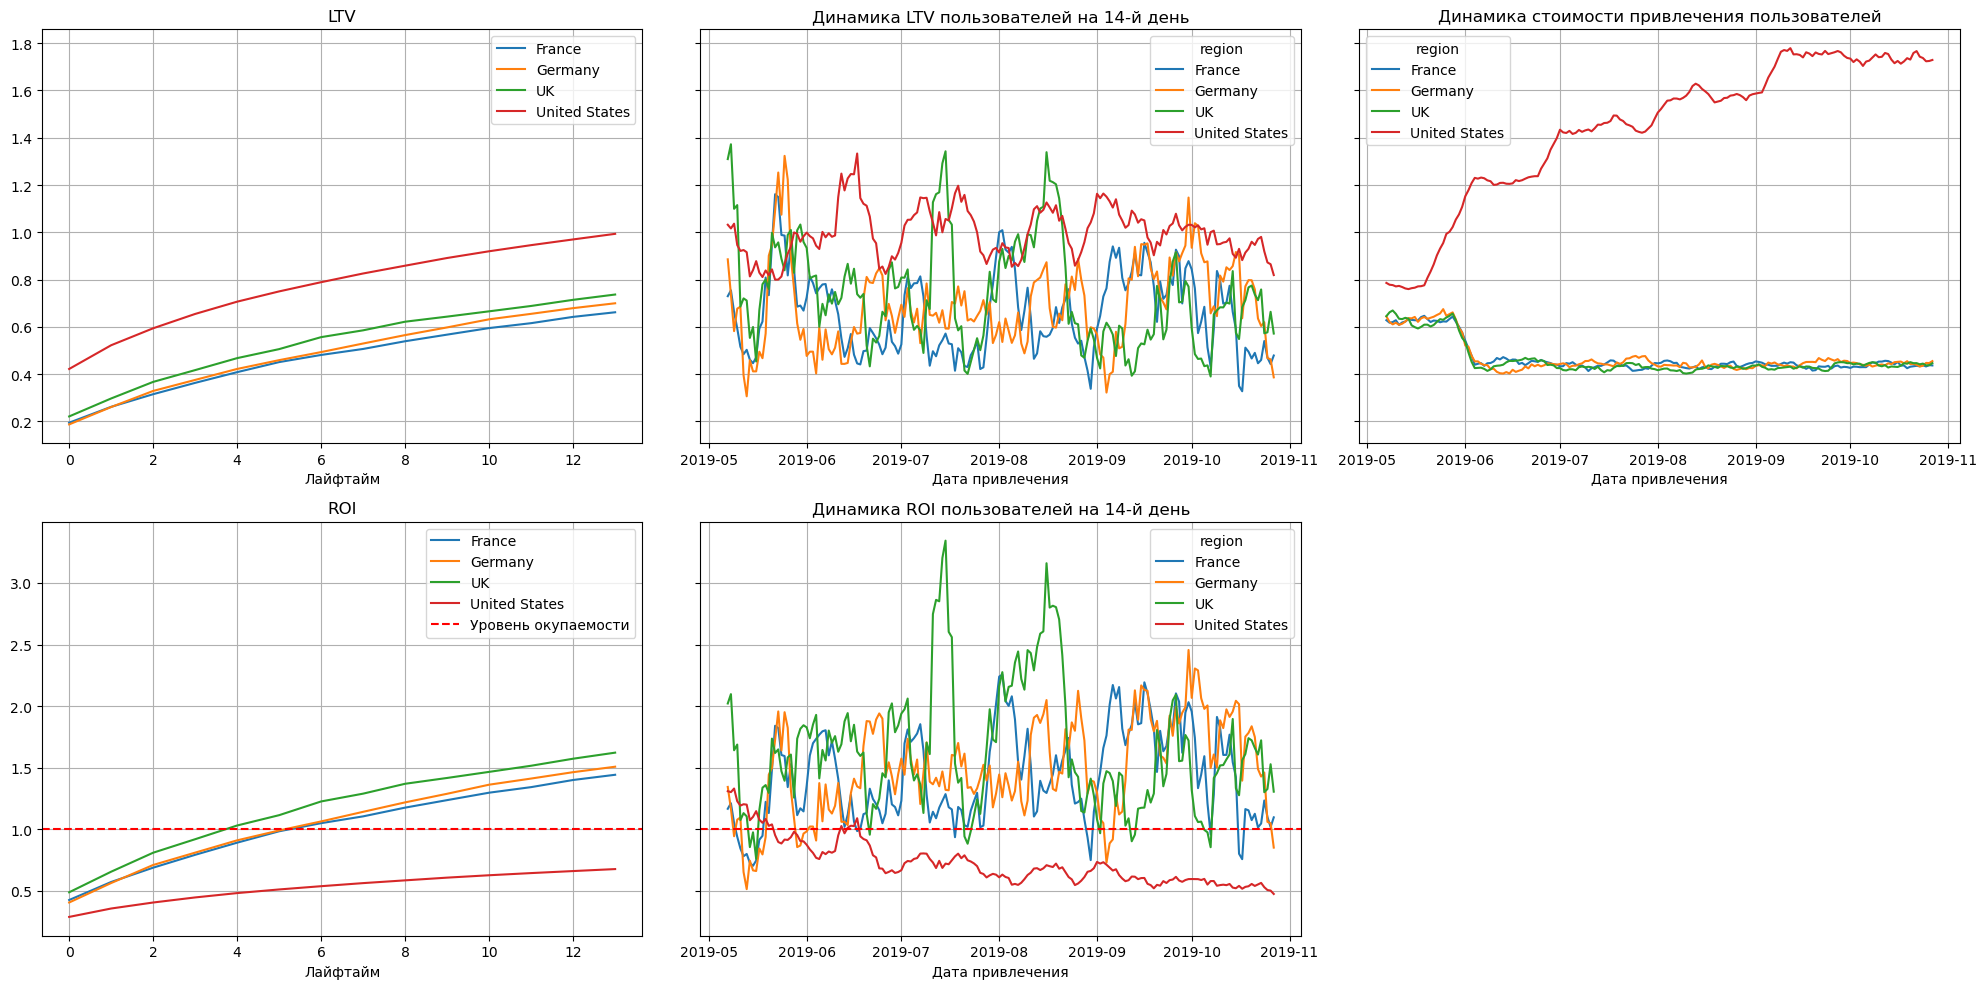

In [59]:
ltv_raw, ltv_grouped,ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

###  Анализ окупаемости рекламы с разбивкой по каналам: LTV и ROI, а также динамика LTV, CAC и ROI

**Рассмотрев график LTV с разбивкой по каналам, мы можем дслеать вывод о том, что самыми прибыльными из них является lambdaMediaAds, второе место занимает TipTop. Сложно определить, какой канал замыкает тройку лидеров. Наименее прибыльными каналми являются: MediaTornado, LeapBob и OppleCreative Media.**

**Несмотря на то, что TipTop занимает второе место по валовой прибыльности, по факту оказывается, что данная платформа не окупается, так же как и FaceBoom и AdNonSese, оба из которых входят в топ-3 по доле платящих пользователей. Раз реклама в них не окупаются, значит, они неэффективны.** 

**На графике динамики LTV на 14-ый день после присоединения выделяется лидер: lambdaMediaAds. Для привлеченных в 10-ых числа июня LTV составил около 5 долларов, что как минимум в 2 раза больше по сравнению с другими каналами. Очевидных аутсайдеров нет.**

**При рассмотрении динамики CAC видно, что стоимость привлечения пользователей практически не менялась на всех каналах за исключением TipTop. Расходы на привлечение пользователей через последнюю расли на протяжении всего исследуемого периода.**

**При рассмотрении динамики ROI на 14-ый день после привлечения на протяжени всего периода так и не окупилась реклама на FaceBoom и TipTop, а денег на них было потрачено значительно больше, чем на другие каналы.** 

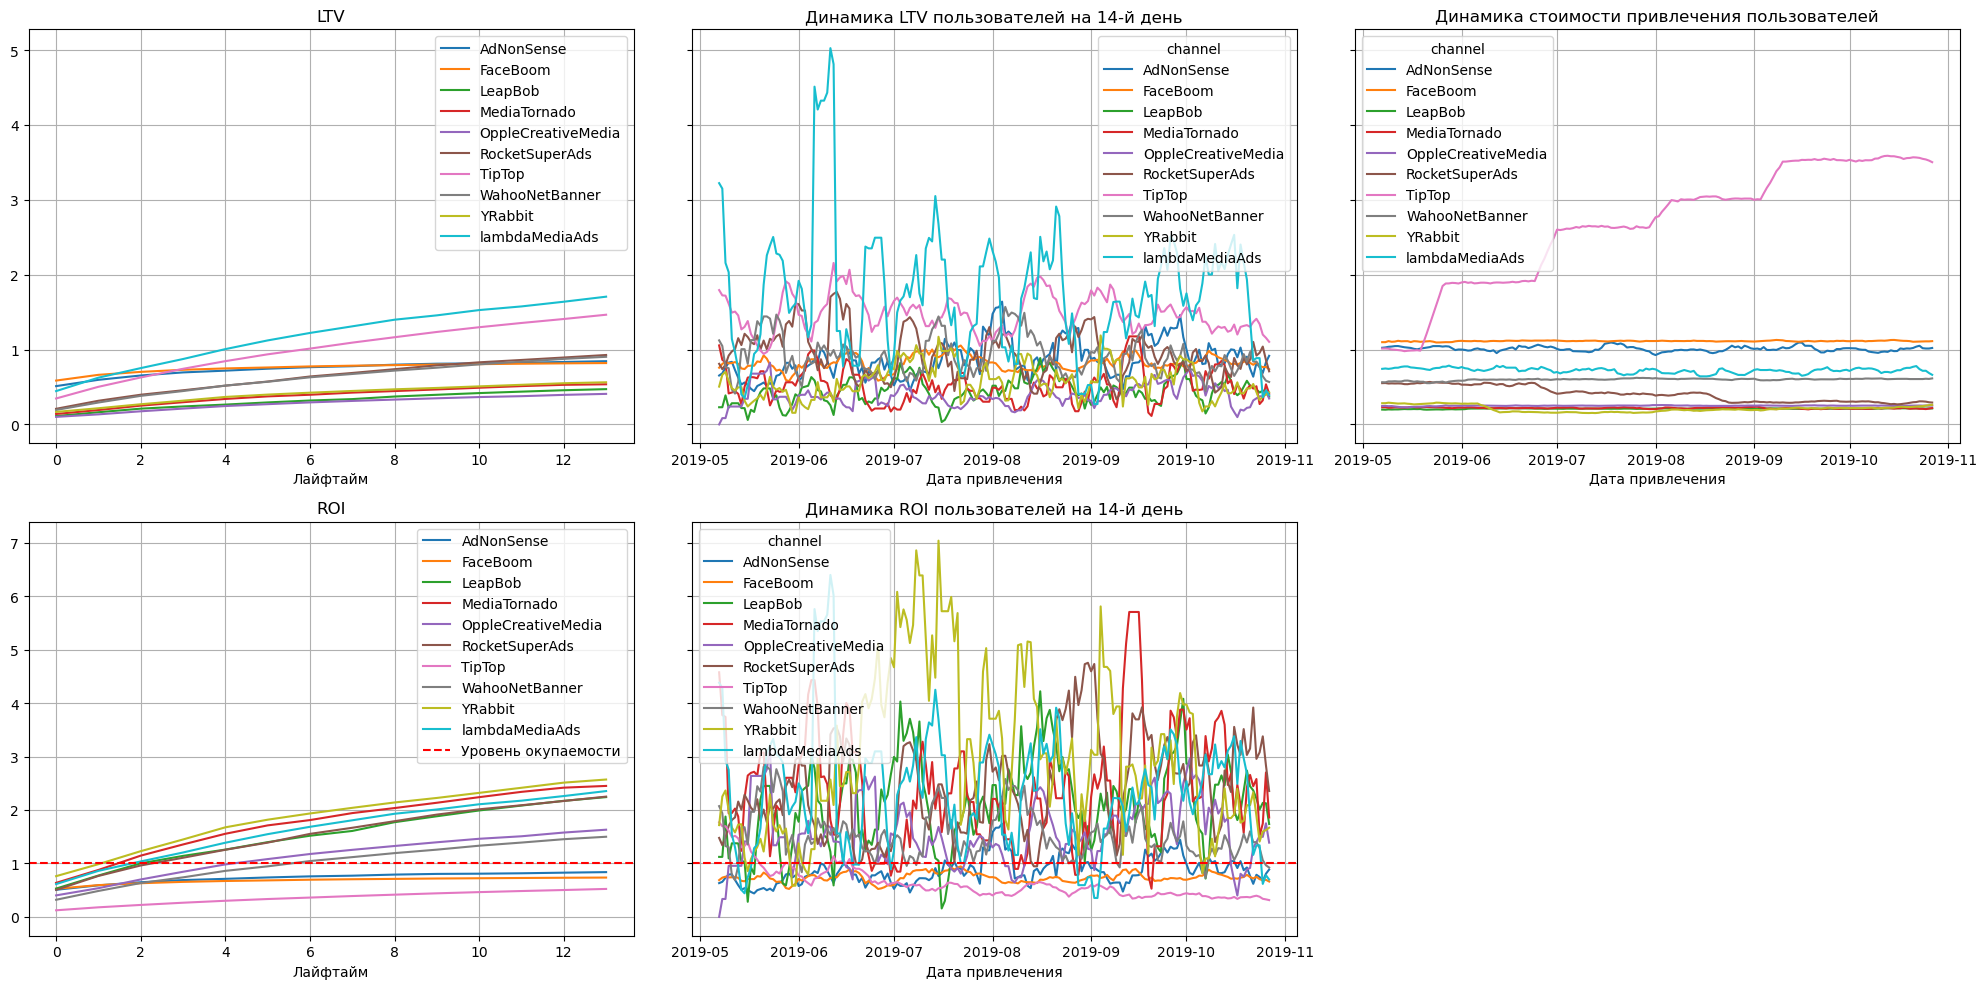

In [60]:
ltv_raw, ltv_grouped,ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Проанализировав данные выше, можно прийти к следующим выводам:

     - несмотря на то, что расходы на рекламу окупаются для большинства стран и каналов, маркетинговая стратегия компании 
    неэффективна, и в связи с этим в целом расходы на рекламу не окупаются. Подтверждением этого является визуализация 
    ROI без разбивки по каким-либо параметрам;
      - большие расходы на привлечение пользователей на таких устройствах, как Mac и iPhone привело к тому, что 
    было уделено недостаточно внимания такому эффективному устройству, как ПК: это единственное устройство, реклама 
    на которое окупилась;
     - в США самый высокий показатель LTV,однако реклама в данном регионе не окупилась, а сама стоимость привлечения 
    одного пользователя в несколько раз превышает эти показатели для других стран;
     - большие вложения в FaceBoom и TipTop не оправдали себя; компания потратила на них большие деньги, и число 
     платящих пользователей не соизмеримо затратам на их привлечение;
     - проблемы окупаемости могут быть вызваны неуспешной рекламной кампанией через TipTop и LeapBob, в силу низких
     значений удержания недостаточно адоптированным под систему iOS и смартфоны интерфейсом, что влияет на то, как 
     пользователи воспринимает продукт, а также техническими проблемами для пользователей из США(так же в силу
     низкого коэфицента удерживания).

### Проверка удержания 

**Посчитаем количество уникальных пользователей за изучаемый период () по столбцу user_id в профилях и сравним его с суммой значений в столбце cohort_size из таблицы удержания.**

In [61]:
# считаем удержание

retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, 14
)

print(retention)  # таблица удержания
print()
print(retention_history)  # таблица динамики удержания

       cohort_size    0         1         2         3         4         5  \
payer                                                                       
False        85848  1.0  0.176882  0.086583  0.052034  0.033559  0.024532   
True          7721  1.0  0.381039  0.293874  0.234037  0.209299  0.187800   

              6         7         8         9        10        11        12  \
payer                                                                         
False  0.018393  0.014013  0.011450  0.009226  0.007164  0.006092  0.005696   
True   0.163839  0.152700  0.141432  0.130164  0.129646  0.115918  0.112421   

             13  
payer            
False  0.004461  
True   0.099339  

                  cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          358  1.0  0.212291  0.072626  0.061453  0.022346   
      2019-05-02          300  1.0  0.196667  0.103333  0.033333  0

In [62]:
# сумма размеров когорт равна числу новых клиентов в изучаемый период
# сумма размеров когорт равна числу новых клиентов в изучаемый период?

report = profiles.query(
     # в профилях находим пользователей, привлечённых с 1 по 5 мая
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 27).date()'
)
print(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), retention['cohort_size'].sum()
    )
)

# сумма размеров платящих когорт равна числу покупателей в изучаемый период?

report = profiles.query(
    # в профилях находим платящих пользователей, привлечённых с 1 по 5 мая
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 27).date() and payer == True'
)
print(
    # считаем уникальных платящих пользователей в профилях 
    # и складываем размеры платящих когорт
    'Общее количество новых покупателей: {} {}'.format(
        len(report['user_id'].unique()),
        retention.query('payer == True')['cohort_size'].sum(),
    )  
)

Общее количество новых пользователей: 93569 93569
Общее количество новых покупателей: 7721 7721


**Все сходится. Кривая удержания платящих пользователей выше.Также обе кривые постепенно снижаются.**

### Проверка конверсии

**Сверим количество уникальных пользователей за изучаемый период (01.05.2019-27.10.2019) по столбцу user_id в профилях и сумму значений cohort_size из таблицы конверсии.**

**Значения сходятся.**

In [63]:
# сумма размеров когорт равна числу новых клиентов в изучаемый период?

report = profiles.query(
    # в профилях находим пользователей, привлечённых с 1 мая по 27 октября
    'datetime(2019, 5, 1).date() <= dt <= datetime(2019, 10, 27).date()'
)
print(
    # считаем уникальных пользователей в профилях и складываем размеры когорт
    'Общее количество новых пользователей: {} {}'.format(
        len(report['user_id'].unique()), conversion['cohort_size'].sum()
    )
)

Общее количество новых пользователей: 93569 93569


**Как видно на графике, на протяжении исследуемого периода не происходит снижение конверсии. Очевидно, что также отсутствуют значения конверсии, которые были бы больше 1.**

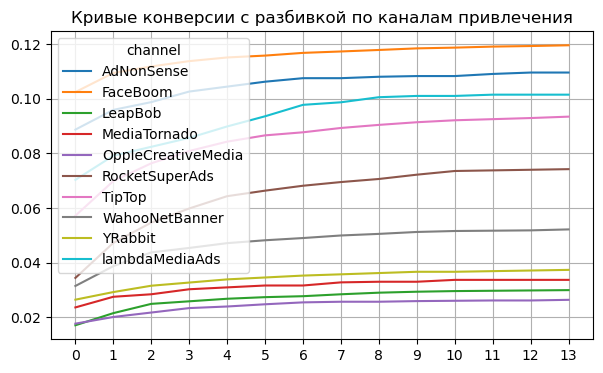

In [64]:
report = conversion.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(7, 4))
plt.title('Кривые конверсии с разбивкой по каналам привлечения')
plt.show() 

**Убедимся в отсутствии значений больше 1. Сделаем срез таблицы конверсии по условию > 1 и заменим остальные значения на пустую строку методом fillna(). Так в таблице останутся только значения больше единицы.Число значений совпадает с тем, которое было  получено при сверении количества уникальных пользователей за изучаемый период по столбцу user_id в профилях и суммы значений cohort_size из таблицы конверсии.**

In [65]:
conversion[conversion > 1].fillna('')

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3880,,,,,,,,,,,,,,
FaceBoom,29144,,,,,,,,,,,,,,
LeapBob,8553,,,,,,,,,,,,,,
MediaTornado,4364,,,,,,,,,,,,,,
OppleCreativeMedia,8605,,,,,,,,,,,,,,
RocketSuperAds,4448,,,,,,,,,,,,,,
TipTop,19561,,,,,,,,,,,,,,
WahooNetBanner,8553,,,,,,,,,,,,,,
YRabbit,4312,,,,,,,,,,,,,,


## Вывод

 Для того, чтобы изучить причины убытков компании Procrastinate Pro+ ,в исследовании были предриняты следующие шаги: 
 
    - выявление источников привлечения пользователей, а также изучение устройств, которыми те пользуются;
    - выявление стоимости привлечения пользователей из различных рекламных каналов(CAC); 
    - выявление прибыли, которую приносит каждый клиент(LTV);
    - выявление перидоов времени, когда расходы на клиенты окупаются; 
    - подсчет общую сумму расходов на маркетинг;
    - изучение распределения рекламных трат по каналам привлечения; 
    - построение визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику;
    - изучение средней стоимости привлечения одного пользователя (CAC) из каждого источника;
    - анализ окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI;
    - проверка конверсии пользователей и динамики её изменения;
    - проверка удержания пользователей;
    - анализ окупаемости рекламы с разбивкой по устройствам;
    - анализ окупаемости рекламы с разбивкой по регионам;
    - анализ окупаемости рекламы с разбивкой по каналам привлечения;
    - проверка конверсии и удержания пользователей.


  Вышеописанный алгоритм позволил выявить, что падение прибыли компании Procrastinate Pro+ связано с неэффективностью маркетинговой компании, в связи с чем расходы на рекламу в совокупности не окупились. 

  В-первых, существуют трудности с окупаемостью устройств Anroid, Mac и iPhone. Визуализации данных указывают на то, что интерфейс продукта Procrastinate Pro+ недостаточно хорошо адоптированы для данных устройств. Это влияет на то, как пользователи воспринимают продукт, что может повлиять на их решение перестать им пользоваться.  

  Во-вторых, в связи с низким уровнем удержания пользователей удалось выяснить, почему рекламная кампания в США не принесла позитивных результатов. Низкий уровень удержания указывает на технические трудности, а первое место по конверсии указывает на то, что в случае, если американские пользователи не сталкивались с трудностями, то они чаще остальных становились покупателями. Таким образом, необходимо устранение технических неполадок. Для повышения удержания пользователей из США рекомендуется разрабатывать персонализированные UX-стратегии; также нужно инвестировать в традиционные маркетинговые стратегии: e-mail рассылки, персональные рекомендации, бонусы и т.д. 

  Во-третьих, было установлено, что более половины всех расходов на рекламу пришлись только на 2 канала (TipTop и FaceBoom); в случае со вторым каналом это связанно с низким показателем удержания пользователя, а во втором, скорее всего, с неправильным ведением маркетинговой стратегии: на TipTop было потраченозначительно больше средств, чем на другие каналы,однако в результате покупателей стало не так много. Необходимо пересмотреть модель ведение рекламной кампании на TipTop таким образом, чтобы та побуждала пользователей не просто ознакамливаться с продуктом компании, но еще и покупать его. Рекомендуется при корректировке маркетинговой стратегии также обратить внимание на канал lambdaMediaAds, поскольку он лидирует по LTV, выделсяся на фоне других в плане динамики данного показателя, а также занимает 3 место по конверсии.
